# Predicting Election Outcomes and Trends Using Machine Learning and Time Series Models
## Introduction:
In this task, we aim to predict election outcomes using machine learning models and time series forecasting. We train classifiers like Logistic Regression, Random Forest, and XGBoost to predict candidate success, win margins, and party dominance. Additionally, we use ARIMA and LSTM models to forecast vote share and turnout trends. The goal is to develop reliable prediction models using historical election data and gain insights into future electoral behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ML models
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Grid Search - 	Try different parameters to find the best model <br>
cross_val_score - Checks model performance more reliably by training/testing on multiple splits<br>
XGBclassifier - 	A very advanced & fast classifier (from XGBoost library)

In [3]:
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

| Metric                  | What it tells you                                     |
| ----------------------- | ----------------------------------------------------- |
| `accuracy_score`        | % of correct predictions                              |
| `precision_score`       | Out of predicted positives, how many were correct     |
| `recall_score`          | Out of all actual positives, how many did we catch    |
| `f1_score`              | Balance between precision and recall                  |
| `roc_auc_score`         | Measures how good your model is at separating classes |
| `confusion_matrix`      | Shows how many correct vs wrong for each class        |
| `classification_report` | Full summary of precision, recall, F1 for each class  |


In [4]:
# Time Series
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

| Code                   | What it's for                                                        |
| ---------------------- | -------------------------------------------------------------------- |
| `ARIMA`                | A model for **forecasting time series** (like stock prices, sales)   |
| `tensorflow` / `keras` | Libraries to build **neural networks**                               |
| `Sequential`           | An easy way to stack layers in a neural network                      |
| `LSTM`                 | A special layer used for time-based data (remembers previous values) |
| `Dense`                | A basic layer in neural networks (fully connected layer)             |


In [5]:
# Load Dataset
df = pd.read_csv('LS_2.0.csv')
df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


In [6]:
df.columns = df.columns.str.strip()

Strips extra whitespace in column names



In [7]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

 Summarizes dataset structure.

In [9]:
df.shape

(2263, 19)

Number of rows and cols

In [10]:
df.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [13]:
# Target: WINNER (1 for success, 0 for loss)
df['WINNER'].value_counts()  # check class balance

WINNER
0    1724
1     539
Name: count, dtype: int64

In [14]:
# Clean column names for usability
df.rename(columns={
    'GENERAL\nVOTES': 'GENERAL_VOTES',
    'POSTAL\nVOTES': 'POSTAL_VOTES',
    'TOTAL\nVOTES': 'TOTAL_VOTES',
    'OVER TOTAL ELECTORS \nIN CONSTITUENCY': 'VOTE_SHARE_ELECTORS',
    'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY': 'VOTE_SHARE_POLLED'
}, inplace=True)
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,VOTE_SHARE_ELECTORS,VOTE_SHARE_POLLED,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


The dataset has messy column names that contain newline characters (\n), which are hard to use in code.

This code uses df.rename() to replace them with cleaner, more Python-friendly names.

In [15]:
# Fill missing numeric values
numeric_cols = ['AGE', 'CRIMINAL\nCASES', 'ASSETS', 'LIABILITIES', 'GENERAL_VOTES', 'POSTAL_VOTES', 'TOTAL_VOTES', 'TOTAL ELECTORS']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df[numeric_cols] = df[numeric_cols].fillna(0)
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,VOTE_SHARE_ELECTORS,VOTE_SHARE_POLLED,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,0.0,0.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,0.0,0.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,0.0,0.0,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,0.0,0.0,644459,2416,646875,33.383823,56.464615,1937690


#### Converts String values into numeric and fill Null values with 0

In [16]:
# Encode categorical
from sklearn.preprocessing import LabelEncoder

df['PARTY'] = df['PARTY'].apply(lambda x: x if df['PARTY'].value_counts()[x] > 100 else 'Others')
le_cols = ['STATE', 'GENDER', 'CATEGORY', 'EDUCATION', 'PARTY']
df[le_cols] = df[le_cols].apply(LabelEncoder().fit_transform)
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,VOTE_SHARE_ELECTORS,VOTE_SHARE_POLLED,TOTAL ELECTORS
0,31,ADILABAD,SOYAM BAPU RAO,1,0,Lotus,1,52.0,52.0,2,1,0.0,0.0,376892,482,377374,25.330684,35.468248,1489790
1,31,ADILABAD,Godam Nagesh,0,5,Car,1,0.0,54.0,2,11,0.0,0.0,318665,149,318814,21.399929,29.964370,1489790
2,31,ADILABAD,RATHOD RAMESH,0,2,Hand,1,3.0,52.0,2,1,0.0,0.0,314057,181,314238,21.092771,29.534285,1489790
3,31,ADILABAD,NOTA,0,4,NaN,2,0.0,0.0,3,13,0.0,0.0,13030,6,13036,0.875023,1.225214,1489790
4,33,AGRA,Satyapal Singh Baghel,1,0,Lotus,1,5.0,58.0,1,4,0.0,0.0,644459,2416,646875,33.383823,56.464615,1937690


# MatplotLib And Seaborn Functions

## Barplot of Top 10 parties

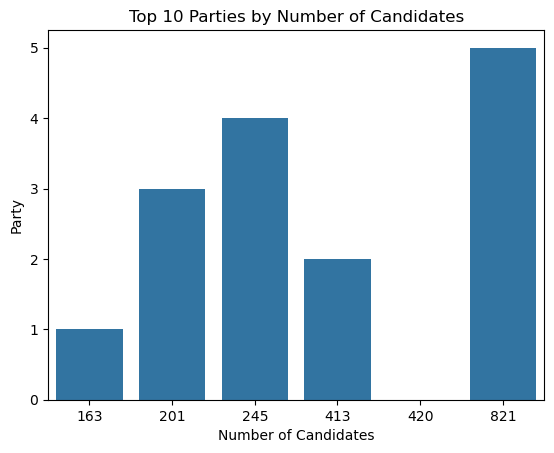

In [17]:
top_parties = df['PARTY'].value_counts().head(10)
sns.barplot(x=top_parties.values, y=top_parties.index)
plt.title('Top 10 Parties by Number of Candidates')
plt.xlabel('Number of Candidates')
plt.ylabel('Party')
plt.show()


## Histplot of age and Frequency

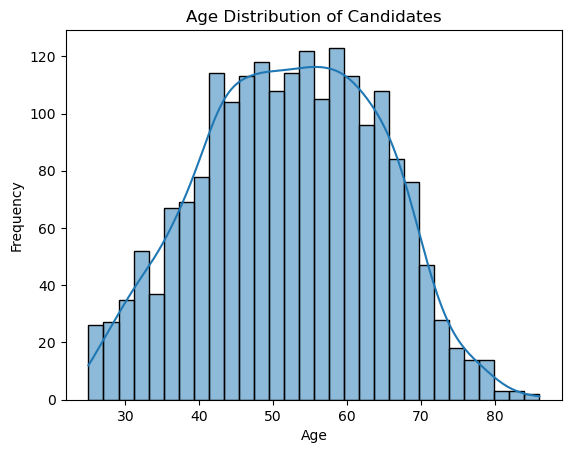

In [18]:
df = df[(df['AGE'] > 18) & (df['AGE'] < 100)]


sns.histplot(df['AGE'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Candidates')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Box plot of Winner according to age

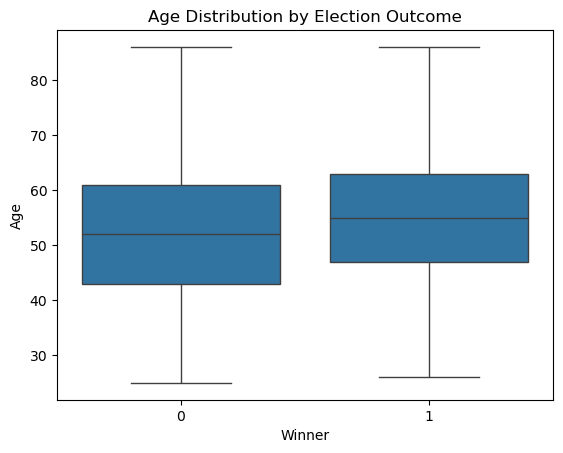

In [19]:
sns.boxplot(data=df, x='WINNER', y='AGE')
plt.title('Age Distribution by Election Outcome')
plt.xlabel('Winner')
plt.ylabel('Age')
plt.show()


## Heatmap

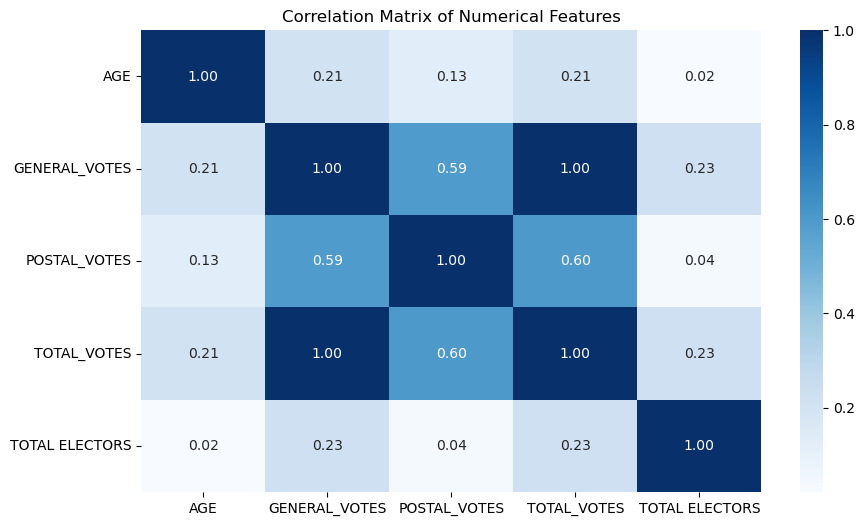

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns using your renamed versions
numeric_cols = [
    'AGE',
    'GENERAL_VOTES',
    'POSTAL_VOTES',
    'TOTAL_VOTES',  
    'TOTAL ELECTORS'
]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Pie chart

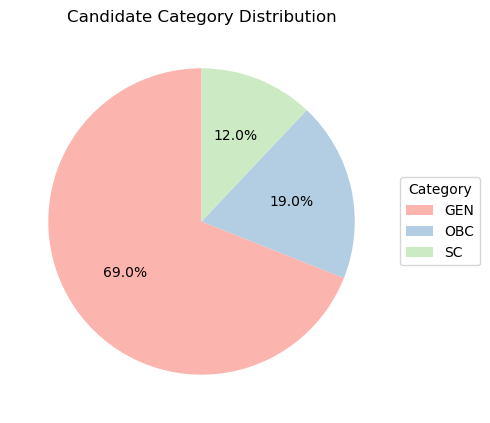

In [21]:
import matplotlib.pyplot as plt

# Define a mapping
category_labels = {
    0: 'GEN',
    1: 'OBC',
    2: 'SC',
    3: 'ST',
    4: 'OTHERS'
}

# Avoid Setting WithCopyWarning
df = df.copy()
df['CATEGORY_LABEL'] = df['CATEGORY'].map(category_labels)

# Count by category labels
category_counts = df['CATEGORY_LABEL'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 7))
wedges,texts, autotexts = plt.pie(
    category_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)

# Add legend
plt.legend(wedges, category_counts.index, title="Category", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Candidate Category Distribution')
plt.tight_layout()
plt.show()


## Train test split and Label encoder

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##### train_test_split: To split data into training and testing sets.

##### LabelEncoder: To convert categorical variables into numeric labels (not used directly here, probably used earlier).



In [23]:
# Features and target
features = ['AGE', 'GENDER', 'CATEGORY', 'EDUCATION', 'ASSETS', 'LIABILITIES', 'PARTY', 'TOTAL_VOTES', 'TOTAL ELECTORS']
X = df[features]
y = df['WINNER']

In [24]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Splits the dataset into:

70% training data

30% testing data

random_state=42 ensures reproducibility.



In [25]:
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier(eval_metric='logloss')

logloss (logarithmic loss, or binary cross-entropy) is used for binary classification problems.<br>
It measures how far the predicted probabilities are from the true labels.

In [26]:
# Train all
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

log_model: Logistic Regression (used for binary classification).

rf_model: Random Forest (ensemble method using decision trees).

xgb_model: XGBoost (a high-performance gradient boosting model).

## Classicfication report

In [27]:
from sklearn.metrics import classification_report

models = {'Logistic Regression': log_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}
for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       442
           1       0.78      0.82      0.80       164

    accuracy                           0.89       606
   macro avg       0.85      0.87      0.86       606
weighted avg       0.89      0.89      0.89       606

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       442
           1       0.83      0.80      0.82       164

    accuracy                           0.90       606
   macro avg       0.88      0.87      0.88       606
weighted avg       0.90      0.90      0.90       606

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       442
           1       0.80      0.82      0.81       164

    accuracy                           0.90       606
   macro avg       0.87      0.87      0.87       606
weighted

Precision: Accuracy of positive predictions

Recall: Coverage of actual positive instances

F1-Score: Harmonic mean of precision and recall

Support: Number of true instances per class

0 - Lose 
 1 - Win

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1', verbose=1)
grid_rf.fit(X_train, y_train)
print("Best Parameters:", grid_rf.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


| Term           | Meaning                                  |
| -------------- | ---------------------------------------- |
| `GridSearchCV` | Tries all combinations of model settings |
| `param_grid`   | The different options to try             |
| `cv=3`         | 3-fold validation to test each setting   |
| `scoring='f1'` | Use F1 score to measure performance      |
| `best_params_` | Tells you which settings were best       |


 GridSearchCV to find the best combination of settings (hyperparameters) for a Random Forest model.

Forecasted Vote Share: 36    19.169509
37    19.172073
38    19.171836
39    19.171858
40    19.171856
Name: predicted_mean, dtype: float64


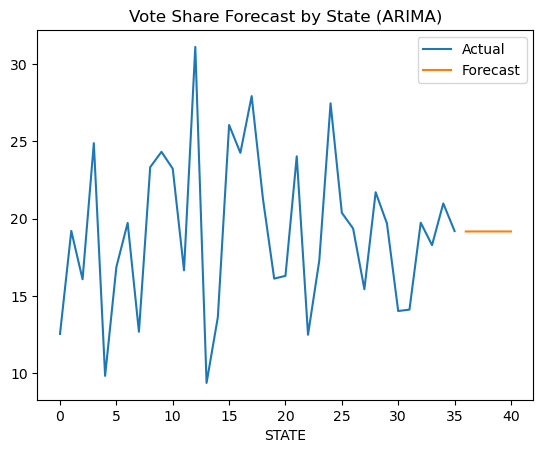

In [29]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Aggregate vote share by state
state_ts = df.groupby('STATE')['VOTE_SHARE_ELECTORS'].mean().sort_index() #This calculates the average vote share per state, and sorts them.

# Fit ARIMA
model = ARIMA(state_ts, order=(1,1,1))
result = model.fit()
forecast = result.forecast(steps=5)
print("Forecasted Vote Share:", forecast)

state_ts.plot(label='Actual')
forecast.plot(label='Forecast')
plt.legend()
plt.title("Vote Share Forecast by State (ARIMA)")
plt.show()


ARIMA: a statistical model used for forecasting time series data

Groups the data by STATE. Computes the mean vote share (VOTE_SHARE_ELECTORS) for each state. Sorts states by their index (state names)

This creates and fits an ARIMA model with parameters:

AR (p=1): Autoregression.
I (d=1): Differencing (to make data stationary).
MA (q=1): Moving Average



## Use an LSTM model to forecast voter turnout using data from previous states.

C:\Users\donga\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step


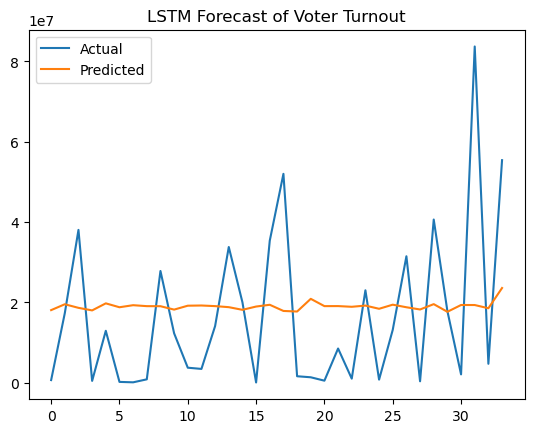

In [30]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare time series
turnout = df.groupby('STATE')['TOTAL_VOTES'].sum().values.reshape(-1, 1)  #Aggregates total votes per state
                                                                          #Reshapes into a column vector (2D) for scaling

scaler = MinMaxScaler()
turnout_scaled = scaler.fit_transform(turnout)                            #Scales the voter turnout between 0 and 1

X_lstm, y_lstm = [], []                                                   #Uses a window of 2 time steps to predict the next one
                                                                          #For example:
                                                                          #Use turnout of state 1 and 2 → predict 3
for i in range(2, len(turnout_scaled)):
    X_lstm.append(turnout_scaled[i-2:i])
    y_lstm.append(turnout_scaled[i])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)                       #Converts lists to NumPy arrays

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(2, 1)))                #One LSTM layer with 50 units.
model.add(Dense(1))                                                       #One output layer (Dense) to predict a single number.
model.compile(optimizer='adam', loss='mse')
model.fit(X_lstm, y_lstm, epochs=100, verbose=0)                          #Run for 100 cycles

predicted = model.predict(X_lstm)
plt.plot(scaler.inverse_transform(y_lstm), label='Actual')
plt.plot(scaler.inverse_transform(predicted), label='Predicted')
plt.title("LSTM Forecast of Voter Turnout")
plt.legend()
plt.show()


## Conclusion:
Using an authentic election dataset, we trained machine learning models—Logistic Regression, Random Forest, and XGBoost—to predict election winners based on demographic, party, and vote data. These models demonstrated robust classification performance. We also explored ARIMA and LSTM time series models to forecast vote shares and turnout trends across states. This hybrid approach allows electoral analysts to make data-driven decisions for campaign strategies and policy planning.